In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

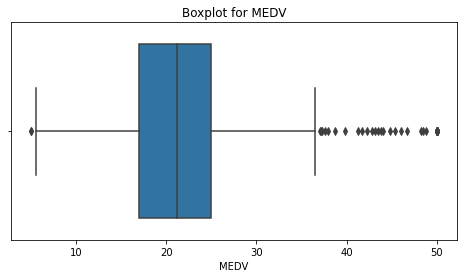

In [4]:
plt.figure(figsize=(8,4))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

In [ ]:
# the values are sparsely scattered

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


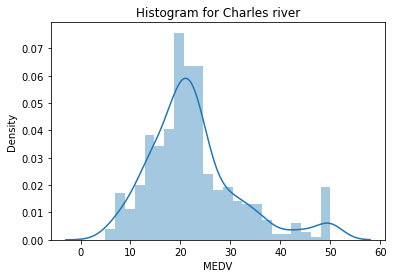

In [13]:
ax = sns.distplot(boston_df['MEDV'], kde = True)
plt.title("Histogram for Charles river")
plt.show()

In [ ]:
# the values are sparsely scattered

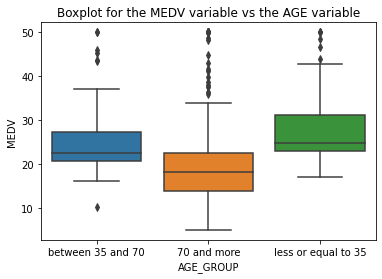

In [14]:
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

In [ ]:
# the Median values of houses (MEDV) of the group (70 and more) > the Median values of houses (MEDV) of the group (35 and 70) > the Median values of houses (MEDV) of the group (70 and more)

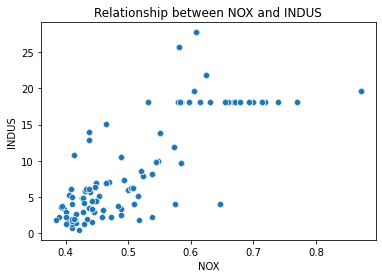

In [15]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

In [ ]:
# NOX and INDUS appear to be positively related as the data has a positive direction.

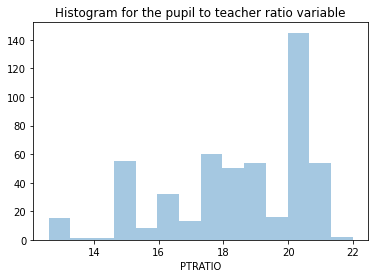

In [22]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

In [ ]:
# the data are very sparsely and tends to accumulate to the right

In [8]:
# 1. State your hypothesis

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null Hypothesis: Mean value of houses bounded by the Charles river vs non-bounded by the Charles river are equal 
# Alternative Hypothesis: There is a difference in mean value of houses bounded by the Charles river vs non-bounded by the Charles river.

In [24]:
# 2. Perform the test Statistics(T-test for independent samples)

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [25]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [ ]:
# 3. State the conclusion from the test.

# like p-value = 7.39e-05 < 0.05, we reject the null hypothesis as there is evidence that there is a significant difference of mean value of houses bounded by the Charles river vs non-bounded by the Charles river.


In [44]:
# 1. State your hypothesis

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Null Hypothesis: Mean value of houses for each proportion of owner occupied units built prior to 1940 (AGE) are equal
# Alternative Hypothesis: There is a difference in mean value of houses for each proportion of owner occupied units built prior to 1940

In [26]:
# 2. Perform the test Statistics(ANOVA).

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = 'less or equal to 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 and more'

scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == 'less or equal to 35']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 and more']['MEDV'], 
                   center='mean')

thirty_lower = boston_df[boston_df['AGE_GROUP'] == 'less or equal to 35']['MEDV']
thirty_sexty = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70']['MEDV']
sexty_older = boston_df[boston_df['AGE_GROUP'] == '70 and more']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirty_lower, thirty_sexty, sexty_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [28]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_GROUP', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_GROUP    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [ ]:
# 3. State the conclusion from the test.

# like p-value = 2.893582414484241e-12 < 0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

In [40]:
# 1. State your hypothesis

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Null Hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# Alternative Hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [29]:
# 2. Perform the test Statistics(Pearson Correlation).

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

In [43]:
# 3. State the conclusion from the test.

# like p-value = 7.91e-98 < 0.05, we reject the null hypothesis as there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [32]:
# 1. State your hypothesis

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Null Hypothesis: Mean value of owner occupied homes influenced by weighted distance to the five Boston employment centres are equal.
# Alternative Hypothesis: There is a difference in Mean value of owner occupied homes influenced by weighted distance to the five Boston employment centres.

In [30]:
# 2. Perform the test Statistics.

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        01:23:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 3. State the conclusion from the test.

# like p-value = 1.21e-08 < 0.05, we reject the null hypothesis as There is a impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. the higher the weighted distance to the five Boston employment centers, the Higher the mean value of the owner-occupied homes.

In [31]:
print('Pearson coef correlation -=',np.sqrt(0.062))

Pearson coef correlation -= 0.24899799195977465


In [ ]:
# Pearson's correlation coefficient shows a positive correlation between DIS and MEDV